In [1]:
import numpy as np
import scipy
import h5py
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from simulation_data import get
from simulation_data.galaxies import GalaxyPopulation
my_galaxy_population = GalaxyPopulation()
from simulation_data.galaxies.galaxy import age_profile, get_star_formation_history, get_galaxy_particle_data, get_stellar_assembly_data, metallicity_profile, metals_profile, avg_abundance, total_stellar_mass

redshift = 0.7

In [2]:
with h5py.File('galaxy_population_data_'+str(0.7)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
#     halflight_radius_U = f['halflight_radius_U'][:]
#     halflight_radius_V = f['halflight_radius_V'][:]
#     halflight_radius_I = f['halflight_radius_I'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    #maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]
    FeH_Re = f['FeH_Re'][:]
    MgFe_Re = f['MgFe_Re'][:]
    MgH_Re = f['MgH_Re'][:]
    FeH_1kpc = f['FeH_1kpc'][:]
    MgFe_1kpc = f['MgFe_1kpc'][:]
    MgH_1kpc = f['MgH_1kpc'][:]

In [3]:
# axes limits
M_lim = [10.5, 12]
logRe_lim = [-0.52, 1.94]
MRe_lim = [9.36, 11.89]
FeHRe_lim = [-0.39, 0.53]
FeH1kpc_lim = [-0.23, 0.53]
MgFeRe_lim = [0.21, 0.53]
MgFe1kpc_lim = [0.16, 0.55]
MgHRe_lim = [-0.03, 0.77]
MgH1kpc_lim = [0.16, 0.54]
age_lim = [0, 2.5]
ageabundance_lim = [-1.8, 0.9]
bigage_lim = [0, 13]


In [4]:
import warnings
warnings.filterwarnings('ignore')

# z=2 parameters
# 1.2 -> 2 Gyr
# 1.5 -> 4 Gyr
# -10.5 -> -11
PSB_selection = (median_age<=2)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.2)
intermediate_quiescent_selection = (median_age>2)&(median_age<=4)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.2)
old_quiescent_selection = (median_age>4)&(np.log10(newbin_current_SFR/10**(total_mass))<=-11.2)
starforming_selection = (np.log10(newbin_current_SFR/10**(total_mass))>-11.2)

In [20]:
print(len(ids[starforming_selection]))
print(len(ids[PSB_selection]))
print(len(ids[intermediate_quiescent_selection]))
print(len(ids[old_quiescent_selection]))

100
88
1477
787


# download z=0.7 galaxies
already ran once

In [3]:
redshift = 0.7
#this initializes the values in simulation_data.galaxies.galaxy_population
# id_dict = {}
# id_dict[0] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=10.8)
# id_dict[1] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.8, mass_max=11.1)
# id_dict[2] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.1, mass_max=11.4)
# id_dict[3] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.4, mass_max=11.7)
# id_dict[4] = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=11.7, mass_max=12.0)

id_range = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12.0)
print(len(id_range))

for idx in id_range:
    get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

#this gets and saves the particle data for each galaxy in our selection
# ids = []
# for b in id_dict:
#     np.random.seed(13)
#     print(len(id_dict[b]))
#     for idx in np.random.choice(id_dict[b], 16, replace=False):
#         ids.append(idx)
#         get_galaxy_particle_data(id=idx, redshift=redshift, populate_dict=False)

2457


In [3]:
redshift = 0.7
#this initializes the values in simulation_data.galaxies.galaxy_population
ids = my_galaxy_population.select_galaxies(redshift=redshift, mass_min=10.5, mass_max=12)
print(len(ids))

#calculate halo properties and store calculated data
my_galaxy_population.get_galaxy_population_data()

2457
2457


{'ids': array([     1,      2,      3, ..., 396710, 397778, 399788]),
 'median_age': array([4.38410935, 4.94902593, 5.49998218, ..., 3.97927964, 4.41021072,
        3.03175621]),
 'halfmass_radius': array([12.73346185, 10.42428663,  4.92888032, ...,  2.91729624,
         1.62281387,  3.39516143]),
 'total_mass': array([11.3362239 , 11.38881529, 11.01399964, ..., 10.50877119,
        10.50340142, 10.53804575]),
 'newbin_current_SFR': array([0.15608668, 0.06717328, 0.01223822, ..., 0.06361471, 0.        ,
        0.34731099]),
 'FeH_Re': array([-0.08219181, -0.15291438, -0.04789625, ...,  0.03029891,
         0.01078042,  0.04889118]),
 'MgFe_Re': array([0.33144975, 0.42400274, 0.41606504, ..., 0.32183209, 0.33163461,
        0.30585003]),
 'MgH_Re': array([0.20099476, 0.22649461, 0.28706303, ..., 0.28918949, 0.28151357,
        0.31029892]),
 'FeH_1kpc': array([0.07030165, 0.03445147, 0.07273648, ..., 0.12109297, 0.03177882,
        0.07766663]),
 'MgFe_1kpc': array([0.39186636, 0.41827

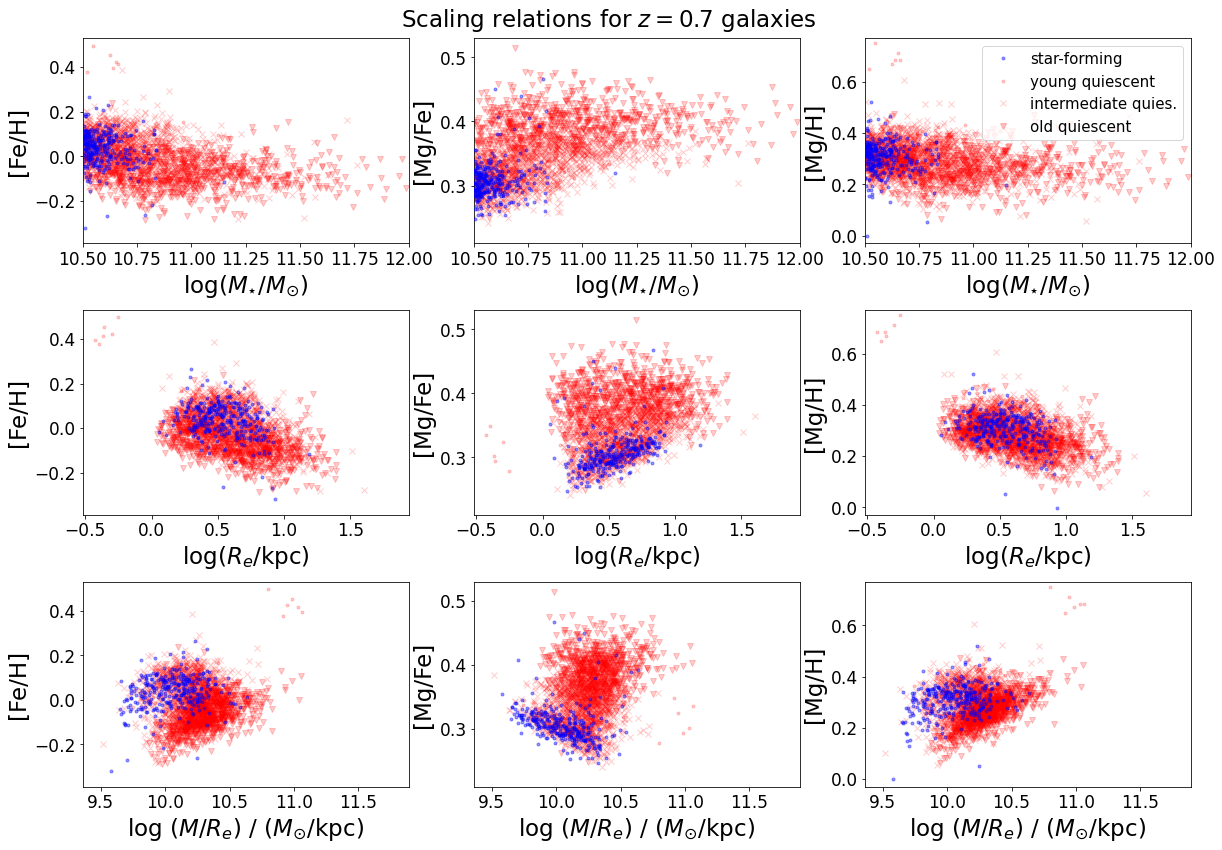

In [5]:
fig = plt.figure(1,figsize=(17,12))
fig.clf()
markersize = 6
fts = 23
fts_s = 17

gs0 = gridspec.GridSpec(3, 1)#,left=0.03, right=0.94,top=0.92,bottom=0.09,wspace=0.3,hspace=0.3)

gs = {}
xx = [total_mass, np.log10(halfmass_radius), np.log10(10**total_mass / halfmass_radius)]
yy = [FeH_Re, MgFe_Re, MgH_Re]
xlim = [M_lim, logRe_lim, MRe_lim]
ylim = [FeHRe_lim, MgFeRe_lim, MgHRe_lim]
xlabel = ['log($M_{\star}/M_{\odot}$)', 'log($R_e$/kpc)', 'log ($M/R_e$) / ($M_{\odot}$/kpc)']
ylabel = ['[Fe/H]', '[Mg/Fe]', '[Mg/H]']

for m in range(3):
    gs[m] = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs0[m])

for m in range(3):
    for k in range(3):
        ax = plt.subplot(gs[m][k])
        
        yy1 = yy[k][starforming_selection]
        xx1 = xx[m][starforming_selection]
        plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', markersize=markersize, zorder=4)

        yy2 = yy[k][PSB_selection]
        xx2 = xx[m][PSB_selection]
        plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

        yy3 = yy[k][intermediate_quiescent_selection]
        xx3 = xx[m][intermediate_quiescent_selection]
        plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quies.', markersize=markersize)

        yy4 = yy[k][old_quiescent_selection]
        xx4 = xx[m][old_quiescent_selection]
        plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)
        
        ax.set_xlim(xlim[m][0], xlim[m][1])
        ax.set_ylim(ylim[k][0], ylim[k][1])
        ax.set_xlabel(xlabel[m], fontsize=fts)
        ax.set_ylabel(ylabel[k], fontsize=fts)
        ax.tick_params(labelsize=fts_s)
        
        if k==2 and m==0:
            ax.legend(fontsize=fts_s-2)
        
fig.suptitle('Scaling relations for $z=$' + str(redshift) + ' galaxies', fontsize=fts)
fig.tight_layout()

plt.savefig('FIGURES\scaling0p7.png', dpi=400)

## [Fe/H]

Text(0.5, 1.0, 'z=0.7 galaxies')

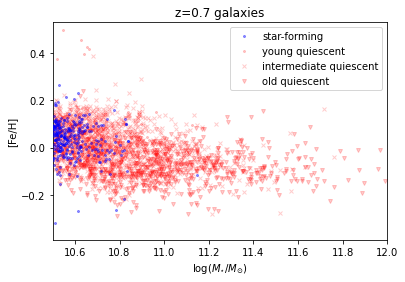

In [34]:
markersize=4

plt.figure()

yy = FeH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Fe/H]')
plt.legend()
plt.title('z=' + str(redshift) + ' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

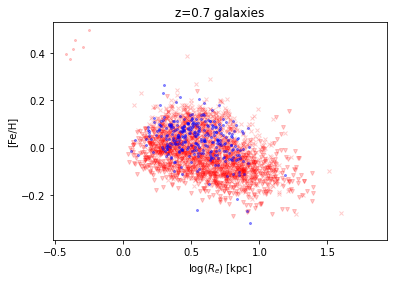

In [35]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

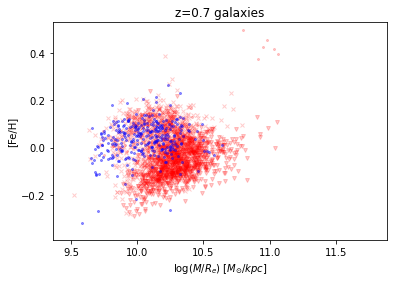

In [36]:
markersize=4

plt.figure()

yy = FeH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

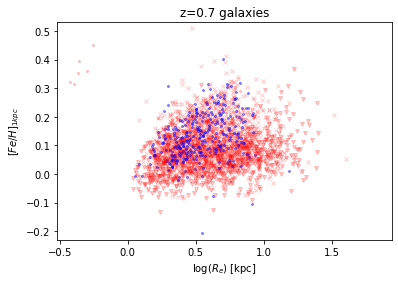

In [37]:
markersize=4

plt.figure()

yy = FeH_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(FeH1kpc_lim[0], FeH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Fe/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

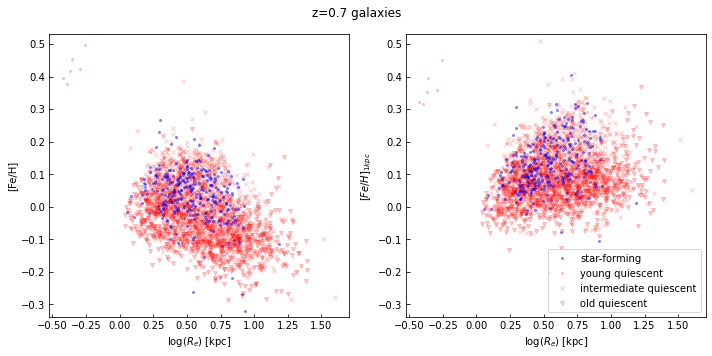

In [8]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
markersize = 4
ymin = -0.34
ymax = 0.53

yya = FeH_Re
yyb = FeH_1kpc
xx = np.log10(halfmass_radius)

yya1 = yya[starforming_selection]
yyb1 = yyb[starforming_selection]
xx1 = xx[starforming_selection]
ax1.plot(xx1, yya1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)
ax2.plot(xx1, yyb1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yya2 = yya[PSB_selection]
yyb2 = yyb[PSB_selection]
xx2 = xx[PSB_selection]
ax1.plot(xx2, yya2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)
ax2.plot(xx2, yyb2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yya3 = yya[intermediate_quiescent_selection]
yyb3 = yyb[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
ax1.plot(xx3, yya3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)
ax2.plot(xx3, yyb3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yya4 = yya[old_quiescent_selection]
yyb4 = yyb[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
ax1.plot(xx4, yya4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)
ax2.plot(xx4, yyb4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

ax1.set_xlabel('log($R_e$) [kpc]')
ax1.set_ylabel('[Fe/H]')
ax1.set_ylim(ymin, ymax)
ax1.tick_params(axis='y', which='minor', left=True)
ax1.tick_params(axis='both', which='both', direction='in')

ax2.set_xlabel('log($R_e$) [kpc]')
ax2.set_ylabel('$[Fe/H]_{1 kpc}$')
ax2.set_ylim(ymin, ymax)
ax2.tick_params(axis='y', which='minor', left=True)
ax2.tick_params(axis='both', which='both', direction='in')
ax2.legend()

f.suptitle('z=' + str(redshift) +' galaxies')

f.tight_layout()

Text(0.5, 1.0, 'z=0.7 galaxies')

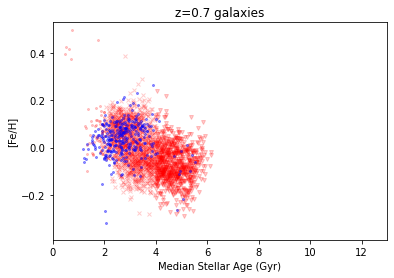

In [7]:
markersize=4

plt.figure()

yy = FeH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(FeHRe_lim[0], FeHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Fe/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/Fe]

Text(0.5, 1.0, 'z=0.7 galaxies')

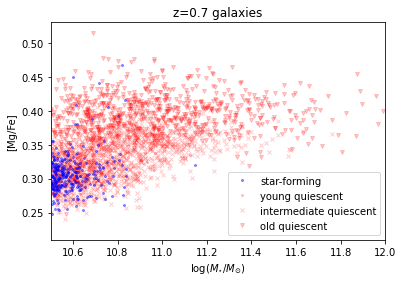

In [38]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/Fe]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

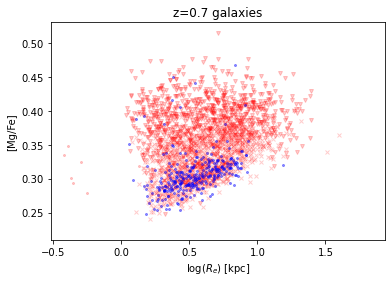

In [39]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

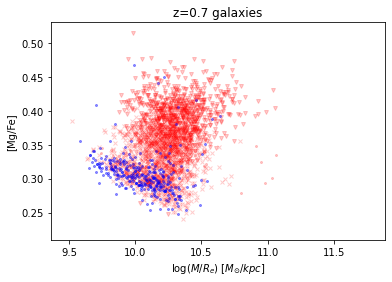

In [40]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

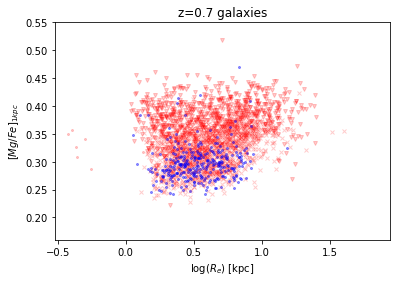

In [41]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgFe1kpc_lim[0], MgFe1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/Fe]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

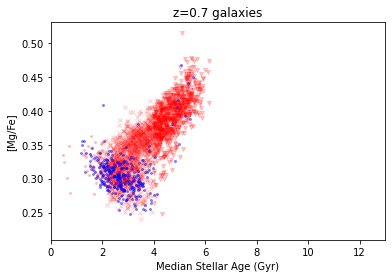

In [10]:
markersize=4

plt.figure()

yy = MgFe_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgFeRe_lim[0], MgFeRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/Fe]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

## [Mg/H]

Text(0.5, 1.0, 'z=0.7 galaxies')

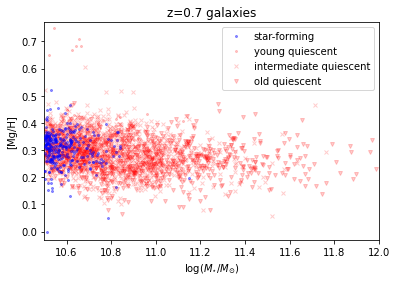

In [42]:
markersize=4

plt.figure()

yy = MgH_Re
xx = total_mass

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(M_lim[0], M_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M_{\star}/M_{\odot}$)')
plt.ylabel('[Mg/H]')
plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

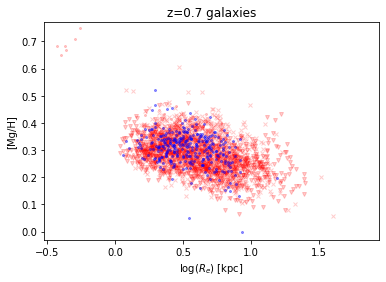

In [43]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

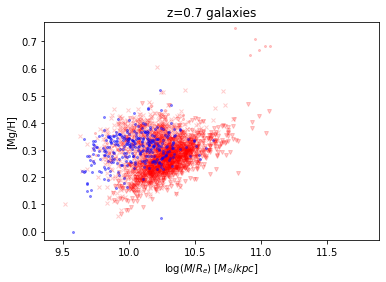

In [44]:
markersize=4

plt.figure()

yy = MgH_Re
xx = np.log10(10**total_mass / halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(MRe_lim[0], MRe_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('log($M/R_e)$ $[M_{\odot}/kpc]$')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

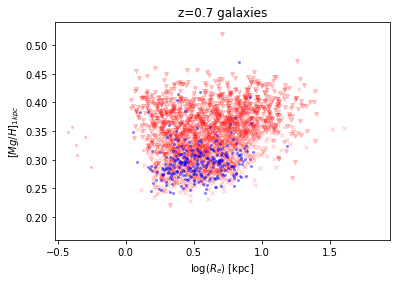

In [33]:
markersize=4

plt.figure()

yy = MgFe_1kpc
xx = np.log10(halfmass_radius)

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(logRe_lim[0], logRe_lim[1])
plt.ylim(MgH1kpc_lim[0], MgH1kpc_lim[1])
plt.xlabel('log($R_e$) [kpc]')
plt.ylabel('$[Mg/H]_{1 kpc}$')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')

Text(0.5, 1.0, 'z=0.7 galaxies')

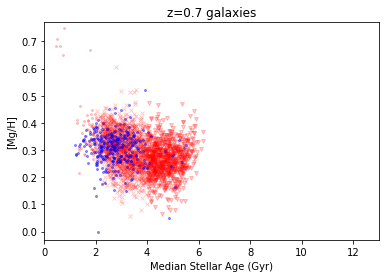

In [9]:
markersize=4

plt.figure()

yy = MgH_Re
xx = median_age

yy1 = yy[starforming_selection]
xx1 = xx[starforming_selection]
plt.plot(xx1, yy1, 'b.', alpha=0.4, label='star-forming', zorder=4, markersize=markersize)

yy2 = yy[PSB_selection]
xx2 = xx[PSB_selection]
plt.plot(xx2, yy2, 'r.', alpha=0.2, label='young quiescent', markersize=markersize)

yy3 = yy[intermediate_quiescent_selection]
xx3 = xx[intermediate_quiescent_selection]
plt.plot(xx3, yy3, 'rx', alpha=0.2, label='intermediate quiescent', markersize=markersize)

yy4 = yy[old_quiescent_selection]
xx4 = xx[old_quiescent_selection]
plt.plot(xx4, yy4, 'rv', alpha=0.2, label='old quiescent', markersize=markersize)

plt.xlim(bigage_lim[0], bigage_lim[1])
plt.ylim(MgHRe_lim[0], MgHRe_lim[1])
plt.xlabel('Median Stellar Age (Gyr)')
plt.ylabel('[Mg/H]')
#plt.legend()
plt.title('z='+str(redshift)+' galaxies')